## Part 3 - Modelling

This workbook is 3 out of 3 parts of a prediction model to determine the occurrence of West Nile Virus (WNV). The focus of this part is to perform modelling on the combined dataset for train and weather that will be fed to the model

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score, precision_recall_curve,average_precision_score, PrecisionRecallDisplay, auc
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train_weather_df = pd.read_csv('../datasets/train_weather.csv')

In [4]:
train_weather_df.head()

,Date,AddressAccuracy,WnvPresent,Day,Month,Year,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,br,dz,fg,hz,ra,ts,tsra,vcts,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,"Address_1000 North Central Park Avenue, Chicago, IL 60651, USA","Address_1000 South California Avenue, Chicago, IL 60612, USA","Address_1000 West 95th Street, Chicago, IL 60643, USA","Address_1100 North Artesian Avenue, Chicago, IL 60622, USA","Address_1100 Roosevelt Road, Chicago, IL 60608, USA","Address_1100 South California Avenue, Chicago, IL 60612, USA","Address_1100 South Peoria Street, Chicago, IL 60608, USA","Address_1100 South State Street, Chicago, IL 60605, USA","Address_1100 West Chicago Avenue, Chicago, IL 60642, USA","Address_1200 West Greenleaf Avenue, Chicago, IL 60626, USA","Address_1300 North Laramie Avenue, Chicago, IL 60651, USA","Address_1400 North Sacramento Avenue, Chicago, IL 60622, USA","Address_1500 North Long Avenue, Chicago, IL 60651, USA","Address_1500 West Granville Avenue, Chicago, IL 60660, USA","Address_1500 West Webster Avenue, Chicago, IL 60614, USA","Address_1700 North Ashland Avenue, Chicago, IL 60622, USA","Address_1700 North Pulaski Road, Chicago, IL 60639, USA","Address_1700 West 95th Street, Chicago, IL 60643, USA","Address_1700 West Addison Street, Chicago, IL 60613, USA","Address_1800 West Farwell Avenue, Chicago, IL 60626, USA","Address_1800 West Leland Avenue, Chicago, IL 60640, USA","Address_2000 East 111th Street, Chicago, IL 60628, USA","Address_2100 North Cannon Drive, Chicago, IL 60614, USA","Address_2100 North Lawler Avenue, Chicago, IL 60639, USA","Address_2100 North Stave Street, Chicago, IL 60647, USA","Address_2100 South Hamlin Avenue, Chicago, IL 60623, USA","Address_2200 North Cannon Drive, Chicago, IL 60614, USA","Address_2200 West 113th Street, Chicago, IL 60643, USA","Address_2200 West 51st Street, Chicago, IL 60609, USA","Address_2200 West 69th Street, Chicago, IL 60636, USA","Address_2200 West 89th Street, Chicago, IL 60643, USA","Address_2200 West Pershing Road, Chicago, IL 60609, USA","Address_2400 East 105th Street, Chicago, IL 60617, USA","Address_2500 South Millard Avenue, Chicago, IL 60623, USA","Address_2500 South Throop Street, Chicago, IL 60608, USA","Address_2500 West Grand Avenue, Chicago, IL 60654, USA","Address_2700 South Western Avenue, Chicago, IL 60608, USA","Address_2800 North Francisco Avenue, Chicago, IL 60618, USA","Address_2900 West 85th Street, Chicago, IL 60652, USA","Address_3000 South Hoyne Avenue, Chicago, IL 60608, USA","Address_3000 West 18th Street, Chicago, IL 60608, USA","Address_3300 North Rutherford Avenue, Chicago, IL 60634, USA","Address_3300 West 104th Street, Chicago, IL 60655, USA","Address_3300 West Randolph Street, Chicago, IL 60612, USA","Address_3400 West 77th Street, Chicago, IL 60652, USA","Address_3500 West 116th Street, Chicago, IL 60655, USA","Address_3500 West 51st Street, Chicago, IL 60632, USA","Address_3600 North Pittsburgh Avenue, Chicago, IL 60634, USA","Address_3700 118th Street, Chicago, IL 60617, USA","Address_3700 North Kedvale Avenue, Chicago, IL 60641, USA","Address_3700 South Pulaski Road, Chicago, IL 60623, USA","Address_3800 East 115th Street, Chicago, IL 60617, USA","Address_3800 North California Avenue, Chicago, IL 60618, USA","Address_3900 North Springfield Avenue, Chicago, IL 60618, USA","Address_3900 South Ashland Avenue, Chicago, IL 60609, USA","Address_4000 East 130th Street, Chicago, IL 60633, USA","Address_4000 North Austin Avenue, Chicago, IL 60634, USA","Address_4000 North Tripp Avenue, Chicago, IL 60641, USA","Address_4000 South Dearborn Street, Chicago, IL 60609, USA","Address_4100 North Oak Park Avenue, Chicago, IL 60634, USA","Address_4200 North Richmond Street, Chicago, IL 60618, USA","Address_4200 West 127th Street, Alsip, IL 60803, USA","Address_4200 West 31st Street, Chicago, IL 60623, USA","Address_4200 West 6

In [5]:
train_weather_df['Date']=pd.to_datetime(train_weather_df['Date'])
train_weather_df.set_index('Date', inplace=True)

In [6]:
train_weather_df.head()

,AddressAccuracy,WnvPresent,Day,Month,Year,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,br,dz,fg,hz,ra,ts,tsra,vcts,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,"Address_1000 North Central Park Avenue, Chicago, IL 60651, USA","Address_1000 South California Avenue, Chicago, IL 60612, USA","Address_1000 West 95th Street, Chicago, IL 60643, USA","Address_1100 North Artesian Avenue, Chicago, IL 60622, USA","Address_1100 Roosevelt Road, Chicago, IL 60608, USA","Address_1100 South California Avenue, Chicago, IL 60612, USA","Address_1100 South Peoria Street, Chicago, IL 60608, USA","Address_1100 South State Street, Chicago, IL 60605, USA","Address_1100 West Chicago Avenue, Chicago, IL 60642, USA","Address_1200 West Greenleaf Avenue, Chicago, IL 60626, USA","Address_1300 North Laramie Avenue, Chicago, IL 60651, USA","Address_1400 North Sacramento Avenue, Chicago, IL 60622, USA","Address_1500 North Long Avenue, Chicago, IL 60651, USA","Address_1500 West Granville Avenue, Chicago, IL 60660, USA","Address_1500 West Webster Avenue, Chicago, IL 60614, USA","Address_1700 North Ashland Avenue, Chicago, IL 60622, USA","Address_1700 North Pulaski Road, Chicago, IL 60639, USA","Address_1700 West 95th Street, Chicago, IL 60643, USA","Address_1700 West Addison Street, Chicago, IL 60613, USA","Address_1800 West Farwell Avenue, Chicago, IL 60626, USA","Address_1800 West Leland Avenue, Chicago, IL 60640, USA","Address_2000 East 111th Street, Chicago, IL 60628, USA","Address_2100 North Cannon Drive, Chicago, IL 60614, USA","Address_2100 North Lawler Avenue, Chicago, IL 60639, USA","Address_2100 North Stave Street, Chicago, IL 60647, USA","Address_2100 South Hamlin Avenue, Chicago, IL 60623, USA","Address_2200 North Cannon Drive, Chicago, IL 60614, USA","Address_2200 West 113th Street, Chicago, IL 60643, USA","Address_2200 West 51st Street, Chicago, IL 60609, USA","Address_2200 West 69th Street, Chicago, IL 60636, USA","Address_2200 West 89th Street, Chicago, IL 60643, USA","Address_2200 West Pershing Road, Chicago, IL 60609, USA","Address_2400 East 105th Street, Chicago, IL 60617, USA","Address_2500 South Millard Avenue, Chicago, IL 60623, USA","Address_2500 South Throop Street, Chicago, IL 60608, USA","Address_2500 West Grand Avenue, Chicago, IL 60654, USA","Address_2700 South Western Avenue, Chicago, IL 60608, USA","Address_2800 North Francisco Avenue, Chicago, IL 60618, USA","Address_2900 West 85th Street, Chicago, IL 60652, USA","Address_3000 South Hoyne Avenue, Chicago, IL 60608, USA","Address_3000 West 18th Street, Chicago, IL 60608, USA","Address_3300 North Rutherford Avenue, Chicago, IL 60634, USA","Address_3300 West 104th Street, Chicago, IL 60655, USA","Address_3300 West Randolph Street, Chicago, IL 60612, USA","Address_3400 West 77th Street, Chicago, IL 60652, USA","Address_3500 West 116th Street, Chicago, IL 60655, USA","Address_3500 West 51st Street, Chicago, IL 60632, USA","Address_3600 North Pittsburgh Avenue, Chicago, IL 60634, USA","Address_3700 118th Street, Chicago, IL 60617, USA","Address_3700 North Kedvale Avenue, Chicago, IL 60641, USA","Address_3700 South Pulaski Road, Chicago, IL 60623, USA","Address_3800 East 115th Street, Chicago, IL 60617, USA","Address_3800 North California Avenue, Chicago, IL 60618, USA","Address_3900 North Springfield Avenue, Chicago, IL 60618, USA","Address_3900 South Ashland Avenue, Chicago, IL 60609, USA","Address_4000 East 130th Street, Chicago, IL 60633, USA","Address_4000 North Austin Avenue, Chicago, IL 60634, USA","Address_4000 North Tripp Avenue, Chicago, IL 60641, USA","Address_4000 South Dearborn Street, Chicago, IL 60609, USA","Address_4100 North Oak Park Avenue, Chicago, IL 60634, USA","Address_4200 North Richmond Street, Chicago, IL 60618, USA","Address_4200 West 127th Street, Alsip, IL 60803, USA","Address_4200 West 31st Street, Chicago, IL 60623, USA","Address_4200 West 65th S

## Set X and y variables/ Train test split

In [8]:
# Set X and y variables

X=train_weather_df.drop('WnvPresent',axis=1)
y=train_weather_df['WnvPresent']

#Train test split
X_train, X_test, y_train,y_test =train_test_split(
    X,
    y,
    stratify=y,
    random_state=50
)

In [9]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)
y_train.value_counts(normalize=True)

(7800,)
(2600,)
(7800, 168)
(2600, 168)


0    0.947051
1    0.052949
Name: WnvPresent, dtype: float64

In [10]:
ss=StandardScaler()
X_train_sc=ss.fit_transform(X_train)
X_test_sc=ss.transform(X_test)

In [11]:
# Instantiate model.
logreg = LogisticRegression()

# Fit model.
logreg.fit(X_train_sc, y_train)

print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient: {logreg.coef_}')

Logistic Regression Intercept: [-4.86349382]
Logistic Regression Coefficient: [[ 4.16391535e-02  2.55106486e-01  2.31615911e+00  3.23522972e-01
   5.97168487e-01  6.09289258e-01  4.52594951e-01 -2.18331279e+00
  -3.11378009e-02  4.30466927e-01 -3.94674001e-02  5.72933170e-01
   9.60305869e-01  9.07389979e-01 -3.07271347e-01  3.49478246e-01
   2.12336600e-01 -5.37758126e-01  1.16404142e-01  6.82213263e-01
   2.88488161e-01 -1.88973783e-01  1.23418378e-01 -5.93355070e-02
  -2.75402833e-01  2.16452345e-01  3.90311409e-01 -9.92362489e-04
   9.77035041e-01  1.03953605e+00  5.41089754e-01  1.11532043e-01
  -1.96382260e-01 -1.98867696e-01  1.01827741e-01  3.65340613e-02
   5.60063270e-02  2.91834289e-02 -1.92797710e-01 -4.10910151e-02
  -2.88513811e-01  1.11089225e-01  7.41050977e-02 -2.36202099e-01
  -1.51567754e-01  1.02299956e-01  4.16290954e-02  6.65693688e-02
   6.14346623e-02 -2.78955774e-01 -1.71686348e-01 -1.78831067e-01
   4.16963874e-02  2.78066274e-02  8.46340066e-02 -1.64531080e-0

C:\Users\Tiancheng\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# Generate predicted values.
logreg.predict(X_test_sc)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
# Step 4 (part 2): Generate predicted probabilities.
np.round(logreg.predict_proba(X_test_sc), 3)

array([[0.988, 0.012],
       [0.952, 0.048],
       [0.997, 0.003],
       ...,
       [0.928, 0.072],
       [0.97 , 0.03 ],
       [0.965, 0.035]])

In [14]:
logreg.score(X_train_sc, y_train)

0.946923076923077

In [15]:
# Step 5: Evaluate model.
logreg.score(X_test_sc, y_test)
#accuracy

0.9465384615384616

C:\Users\Tiancheng\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


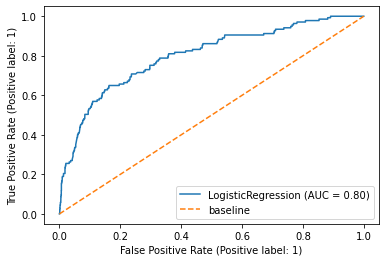

In [16]:
plot_roc_curve(logreg, X_test_sc, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

C:\Users\Tiancheng\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


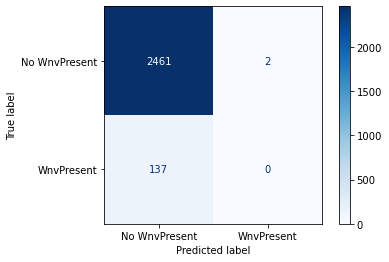

In [17]:
plot_confusion_matrix(logreg, X_test_sc, y_test, cmap='Blues', 
                      values_format='d', display_labels=['No WnvPresent', 'WnvPresent']);

## PCA Logistic Regression (with SMOTE)

Noted that this is an unbalanced problem that we are dealing with, and the vanilla logistic regression is mostly predicting for No WNV present. As such, we will be implementing SMOTE to help deal with this unabalance.

In [18]:
# Creating a pipeline model for StandardScaler, SMOTE, PCA and Logistic Regression
pipe_pca_logreg = Pipeline([
                ('sampling', SMOTE(random_state=100)),
                 ('pca', PCA(random_state=100)),
                 ('logreg', LogisticRegression(solver='liblinear', random_state=100))
                ])

In [19]:
# pipe_pca_logreg_params = {
#     'logreg__penalty': ['l1','l2'],
#     'logreg__C': [1, 1.5, 2],
#     'pca__n_components': [21,22,23,24],
#     'sampling__sampling_strategy': ['minority', 'not minority', 'auto'],
#     'sampling__k_neighbors': [3, 5],
# }

pipe_pca_logreg_params = {
    'logreg__penalty': ['l1'],
    'logreg__C': [1],
    'pca__n_components': [23],
    'sampling__sampling_strategy': ['auto','minority'],
    'sampling__k_neighbors': [13],
}

In [20]:
gs_pca_logreg = GridSearchCV(pipe_pca_logreg, pipe_pca_logreg_params, verbose=2, n_jobs=-1)

In [21]:
%%time
gs_pca_logreg.fit(X_train_sc, y_train) 

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 828 ms
Wall time: 3.44 s


GridSearchCV(estimator=Pipeline(steps=[('sampling', SMOTE(random_state=100)),
                                       ('pca', PCA(random_state=100)),
                                       ('logreg',
                                        LogisticRegression(random_state=100,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [1], 'logreg__penalty': ['l1'],
                         'pca__n_components': [23],
                         'sampling__k_neighbors': [13],
                         'sampling__sampling_strategy': ['auto', 'minority']},
             verbose=2)

In [27]:
# for sorting out later, to confirm how we want to present modeling
preds = gs_pca_logreg.predict(X_test_sc)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
acc = (tp + tn) / (tn + fp + fn + tp)
#misclass = 1 - acc
#sens = tp / (tp + fn)
#spec = tn / (tn + fp)
#prec = tp / (tp + fp)
#f_one_score = f1_score(y_test, preds)
#roc_auc = roc_auc_score(y_test, gs_pca_logreg.predict_proba(X_test_sc)[:,1])
#pr_score = average_precision_score(y_test, gs_pca_logreg.predict_proba(X_test_sc)[:,1])

In [28]:
acc

0.7138461538461538

In [29]:
misclass

0.2861538461538462

In [30]:
roc_auc

0.7135443987066984

C:\Users\Tiancheng\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Tiancheng\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


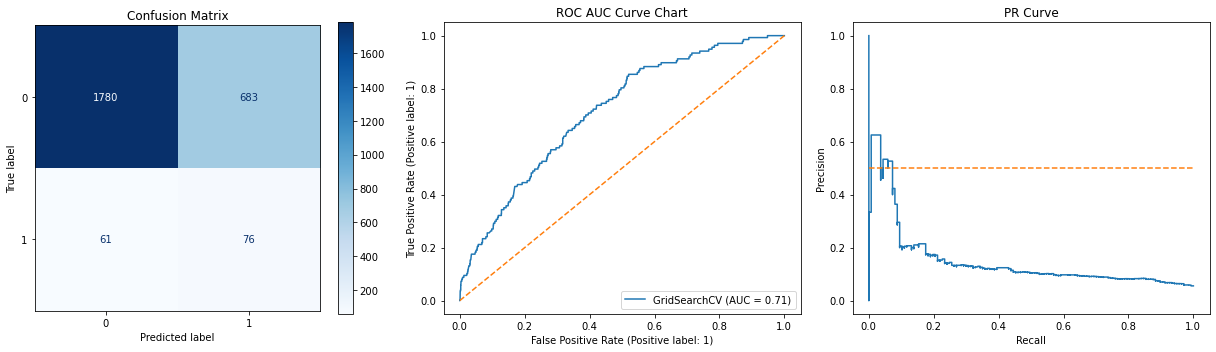

In [31]:
fig, axes = plt.subplots(ncols=3, figsize=(17,5))
    
cm_chart = plot_confusion_matrix(gs_pca_logreg, X_test_sc, y_test, cmap='Blues', values_format='d', ax=axes[0]);
axes[0].title.set_text('Confusion Matrix')
# cm_chart = plot_confusion_matrix(gs_pca_logreg, X_test_sc, y, cmap='Blues', values_format='d',display_labels=['WNV Not Present (0)','WNV Present (1)'], ax=axes[0]);
roc_curve = plot_roc_curve(gs_pca_logreg, X_test_sc, y_test, ax=axes[1])
axes[1].plot([0, 1], [0, 1], label='baseline', linestyle='--' )
axes[1].title.set_text('ROC AUC Curve Chart')
precision, recall, thresholds = precision_recall_curve(y_test, gs_pca_logreg.predict_proba(X_test_sc)[:,1])
pr_curve = PrecisionRecallDisplay(precision=precision, recall=recall)#(gs_pca_logreg, X_test_sc, y, ax=axes[2])
pr_curve.plot(ax=axes[2])
#    axes[2].plot([min(thresholds),max(thresholds)], [min(thresholds),max(thresholds)], label='threshold', linestyle='--')
axes[2].plot([0, 1], [0.5, 0.5],label='baseline', linestyle='--' )
axes[2].title.set_text('PR Curve')
fig.tight_layout()